In [96]:
import pandas as pd

Train the Machine learning model using the given data set and predict the highest salary will be provided to which freature group people. 

 Provide the grapich visulization of the data set with different features and their values.

In [100]:
df = pd.read_csv('income_analysis.csv')

In [102]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [104]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [106]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [108]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [110]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_').astype(int)], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_').astype(int)], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_').astype(int)], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_').astype(int)], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_').astype(int)], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_').astype(int)], axis=1)


In [112]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


Everything except the gender and income consider as a numeric or binary 

In [115]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

For the gender and income column we are converting the data into numeric value by applhying condition, write 1 if male or >50k value is given 
else write 0

In [118]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [120]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

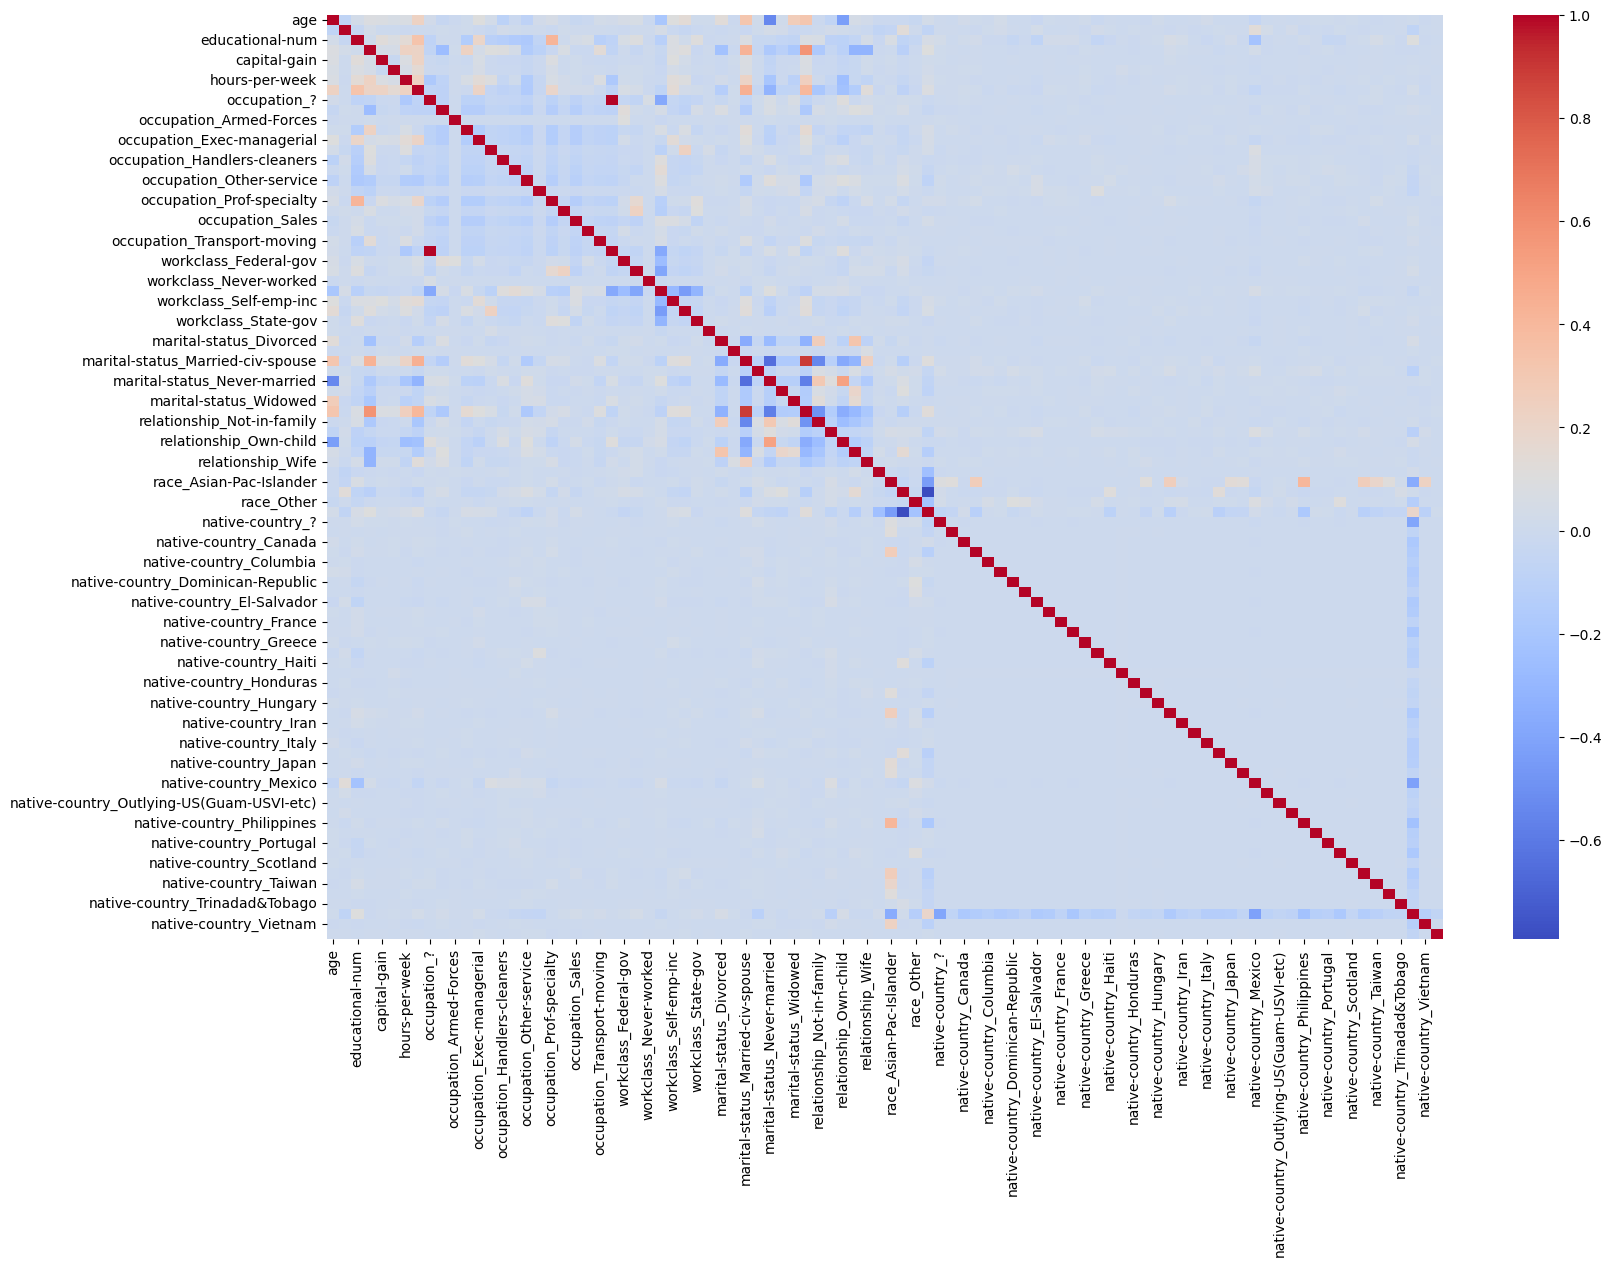

In [122]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [123]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [124]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop= sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [125]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


Now we have only 19 columns very less and essential freatures that we can use to train the model.

<Axes: >

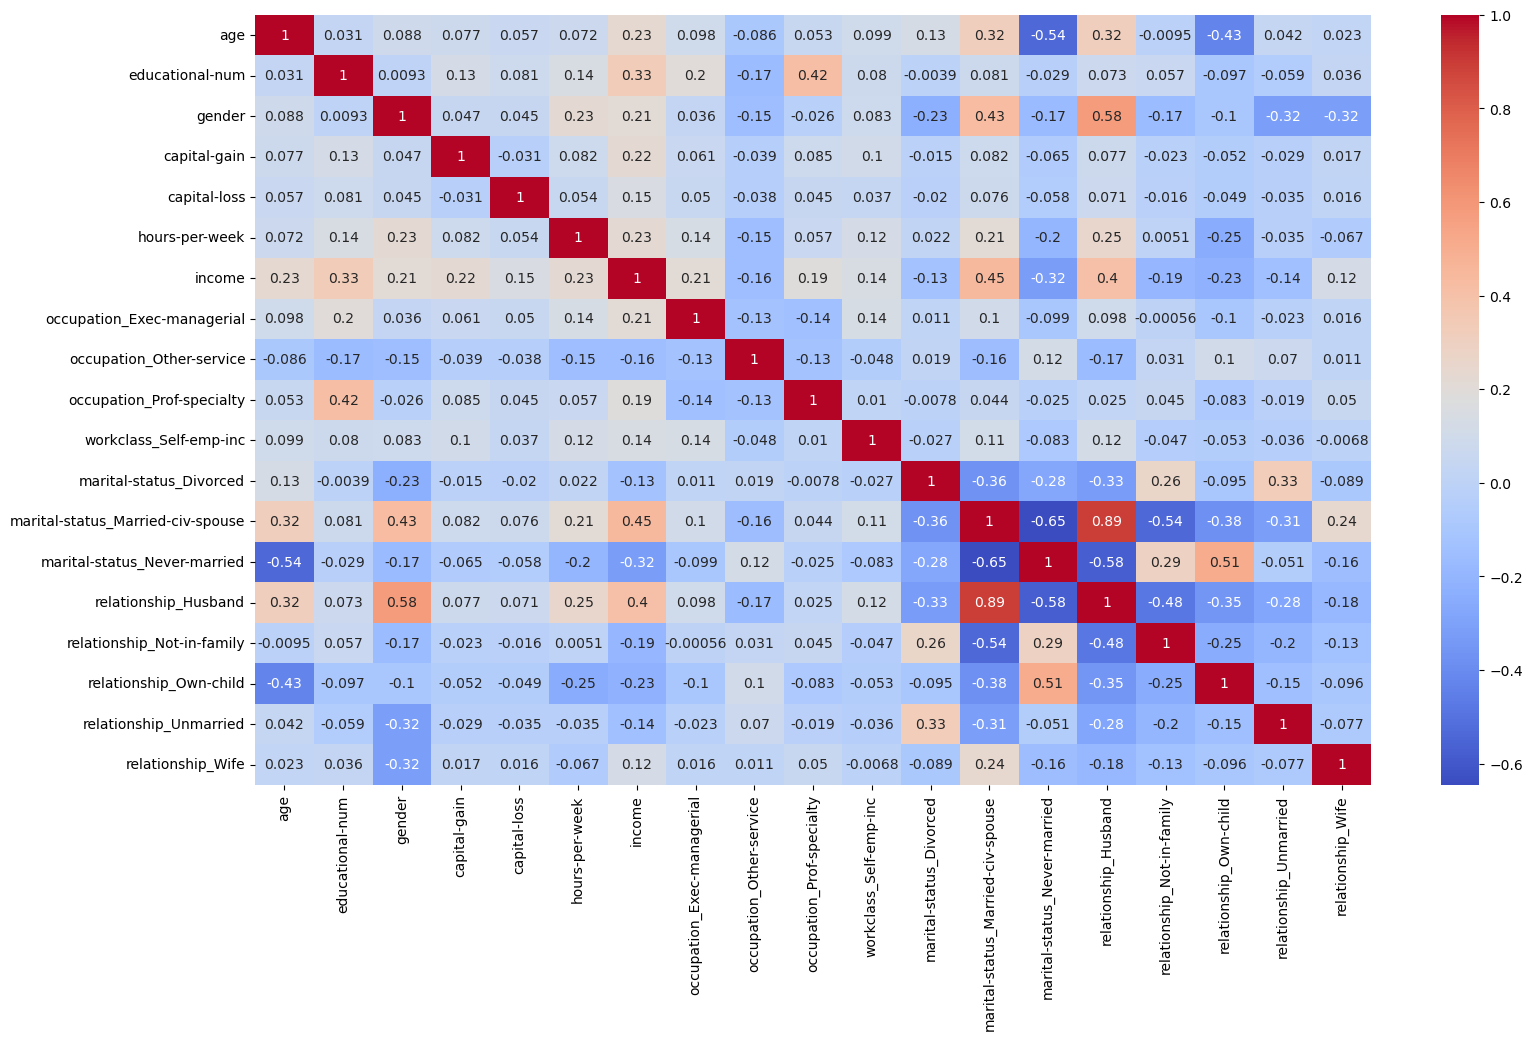

In [127]:
plt.figure(figsize=(18,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

Nature of this data set is  very decision like therfore Randomforest Model is best suitable option here.

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)

In [131]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
36926,44,13,1,0,0,60,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6228,29,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34726,36,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10665,29,9,0,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36802,35,9,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,36,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28909,27,9,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13006,57,4,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18116,23,9,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [132]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
48449,20,9,0,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44945,24,5,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15237,23,9,1,0,1573,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15248,17,8,1,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
24843,49,9,1,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44694,26,9,1,0,0,42,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9015,32,10,1,0,0,48,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22419,21,9,0,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44558,20,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [133]:
train_x = train_df.drop('income', axis=1)
train_y = train_df['income']

test_x = test_df.drop('income', axis=1)
test_y = test_df['income']

In [134]:
forest = RandomForestClassifier()
forest.fit(train_x, train_y)

RandomForestClassifier()

In [135]:
forest.score(test_x, test_y)

0.8530044016787798

RandomForest Model is give 85% accuracy, it predicting weather the person is earning more or less than 50K.

Now for more accuracy, hyperparameter tunning can be done.

In [139]:
forest.feature_importances_

array([2.25737398e-01, 1.26504472e-01, 1.07383501e-02, 1.07667494e-01,
       3.82200167e-02, 1.16656103e-01, 1.56591285e-03, 5.12528027e-03,
       5.22792312e-05, 5.82259771e-03, 1.95177647e-02, 4.54103773e-03,
       3.55261719e-03, 4.06996955e-03, 7.63146445e-03, 1.82498615e-04,
       1.74316285e-02, 2.85034895e-03, 6.17956390e-03, 4.63104456e-03,
       4.15093697e-03, 2.03995703e-03, 4.84349658e-03, 5.77741314e-03,
       9.71366874e-08, 9.12550478e-03, 6.24506488e-03, 8.21311779e-03,
       4.36994658e-03, 1.24153621e-04, 5.72539404e-03, 3.57481023e-04,
       8.00439560e-02, 7.95683436e-04, 2.19973275e-02, 1.81147149e-03,
       1.76137408e-03, 5.21158431e-02, 1.11485954e-02, 1.48425266e-03,
       8.93034327e-03, 5.85307986e-03, 9.04854899e-03, 1.39601620e-03,
       3.14176786e-03, 4.75906462e-03, 1.10273645e-03, 6.32894893e-03,
       2.88416785e-03, 3.85676469e-04, 1.45397454e-03, 5.78951524e-04,
       2.99614720e-04, 8.07138789e-04, 2.50588729e-04, 1.83676955e-04,
      

In [147]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [148]:
importances = dict(zip(forest.feature_names_in_,forest.feature_importances_))
importances = {k : v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse = True)}

In [149]:
importances

{'age': 0.22573739844568178,
 'educational-num': 0.12650447215210872,
 'hours-per-week': 0.11665610311689692,
 'capital-gain': 0.1076674937387996,
 'marital-status_Married-civ-spouse': 0.08004395599163316,
 'relationship_Husband': 0.05211584307834507,
 'capital-loss': 0.03822001666785607,
 'marital-status_Never-married': 0.021997327542216706,
 'occupation_Exec-managerial': 0.019517764655044997,
 'occupation_Prof-specialty': 0.017431628481900024,
 'relationship_Not-in-family': 0.011148595444873715,
 'gender': 0.01073835006128992,
 'workclass_Private': 0.009125504782365393,
 'relationship_Wife': 0.009048548991736436,
 'relationship_Own-child': 0.008930343267084147,
 'workclass_Self-emp-not-inc': 0.008213117789546184,
 'occupation_Other-service': 0.007631464454167228,
 'race_White': 0.006328948926754718,
 'workclass_Self-emp-inc': 0.006245064880403444,
 'native-country_United-States': 0.006244504840183654,
 'occupation_Sales': 0.006179563897169179,
 'relationship_Unmarried': 0.00585307986

In [158]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[50, 100, 250],
    'max_depth': [50, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}    

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,verbose=10)

In [160]:
grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.845 total time=   2.1s
[CV 2/5; 1/48] START max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   2.1s
[CV 3/5; 1/48] START max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.848 total time=   2.2s
[CV 4/5; 1/48] START max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.847 total time=   2.2s
[CV 5/5; 1/48] START max_depth=50, max_features=sqrt, min_samples_split=2, n_estimator

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [162]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4)

In [164]:
forest = grid_search.best_estimator_

In [166]:
forest.score(test_x, test_y)

0.8691780120790255

After the hyperparameter tunning the accuracy of predection of the model is slightly increases.

In [169]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [171]:
importances

{'age': 0.14836726451553295,
 'capital-gain': 0.13594323473167444,
 'educational-num': 0.12838056790457114,
 'marital-status_Married-civ-spouse': 0.09485335118507389,
 'hours-per-week': 0.09208306167527813,
 'relationship_Husband': 0.05902511043452493,
 'capital-loss': 0.04452323133906206,
 'marital-status_Never-married': 0.03318627983257906,
 'occupation_Exec-managerial': 0.02340997910638277,
 'occupation_Prof-specialty': 0.02196683332456558,
 'relationship_Not-in-family': 0.014727316277506062,
 'gender': 0.014315377851644355,
 'relationship_Own-child': 0.013952160381253567,
 'occupation_Other-service': 0.010532809237978554,
 'relationship_Wife': 0.010001952244199423,
 'workclass_Self-emp-not-inc': 0.008839569213837602,
 'marital-status_Divorced': 0.00868558079725289,
 'workclass_Private': 0.008329987297983208,
 'relationship_Unmarried': 0.007425843149657069,
 'workclass_Self-emp-inc': 0.007199013630498479,
 'native-country_United-States': 0.006237085072441973,
 'race_White': 0.006094

#                                                                    The End 